## 1.1 Packages & Libraries

In [145]:
#!pip install split-folders
#!pip install pydot
#!pip install graphviz
#!pip install keras
#!pip install visualkeras

import numpy as np
import os
import glob
import pandas as pd
import cv2
from tqdm import tqdm
import io
import tensorflow.keras
import sklearn
import pydot
import graphviz
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torch.optim.lr_scheduler import StepLR

import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import visualkeras

from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout, Dense, Activation
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix
import IPython
import scikitplot as skplt

## 1.2 Specify a classification class

In [146]:
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']

## 1.3 Data Split (training:test = 8:2)

In [ ]:
#import splitfolders
#splitfolders.ratio("C:/archive/Training", output="C:/archive/Out", seed=1234, ratio=(.8, .2))

## 1.4.1 Building 'ImageDataGenerator(IDG)'

In [41]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255 # rescale
)

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255) # rescale

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255) # rescale

Copying files: 5712 files [00:23, 243.57 files/s]


## 1.4.2 Apply IDG by data set

In [212]:
train_dir = "C:/archive/Train"
validation_dir = "C:/archive/Validation"
test_dir = "C:/archive/Test"

train_generator = train_datagen.flow_from_directory(
        # 타겟 디렉터리
        train_dir,
        target_size =(150, 150),
        batch_size=15,
        class_mode='categorical') #주어진 데이터는 4개의 클래스가 있으므로 'categorical'

validation_generator = validation_datagen.flow_from_directory(
        # 타겟 디렉터리
        validation_dir,
        target_size =(150, 150),
        batch_size=15,
        class_mode='categorical') #주어진 데이터는 4개의 클래스가 있으므로 'categorical'

test_generator = test_datagen.flow_from_directory(
        # 타겟 디렉터리
        test_dir,
        target_size =(150, 150),
        batch_size=15,
        class_mode='categorical') #주어진 데이터는 4개의 클래스가 있으므로 'categorical'

x_train, y_train = train_generator.next()
x_validation, y_validation = validation_generator.next()
x_test, y_test = test_generator.next()

Found 4568 images belonging to 4 classes.
Found 1144 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


## 1.5.1 Building CNN Model<br>

Architecture:  Convolution layer-5 (convolution operation + BatchNormalization + ActivationFunction + MaxPooling) + F.C layer-2(classification)

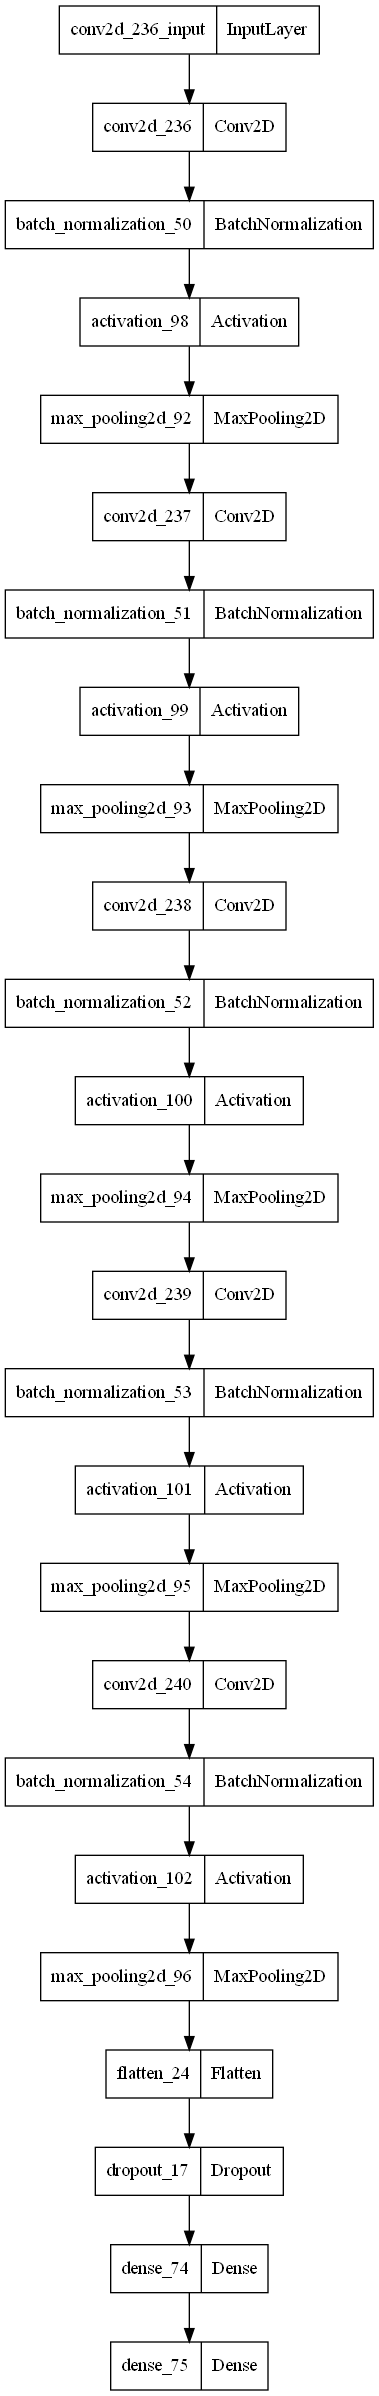

In [222]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32,  kernel_size=(3, 3),
                        padding = 'same',
                        input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64,  kernel_size=(3, 3),
                        padding = 'same',
                        ))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128,  kernel_size=(3, 3),
                        padding = 'same',
                        ))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256,  kernel_size=(3, 3),
                        padding = 'same',
                        ))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256,  kernel_size=(3, 3),
                        padding = 'same',
                        ))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten()) # F.C layer에 넣기 위한 flatten
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax')) # 분류를 위한 활성함수

model.summary
tensorflow.keras.utils.plot_model(model)

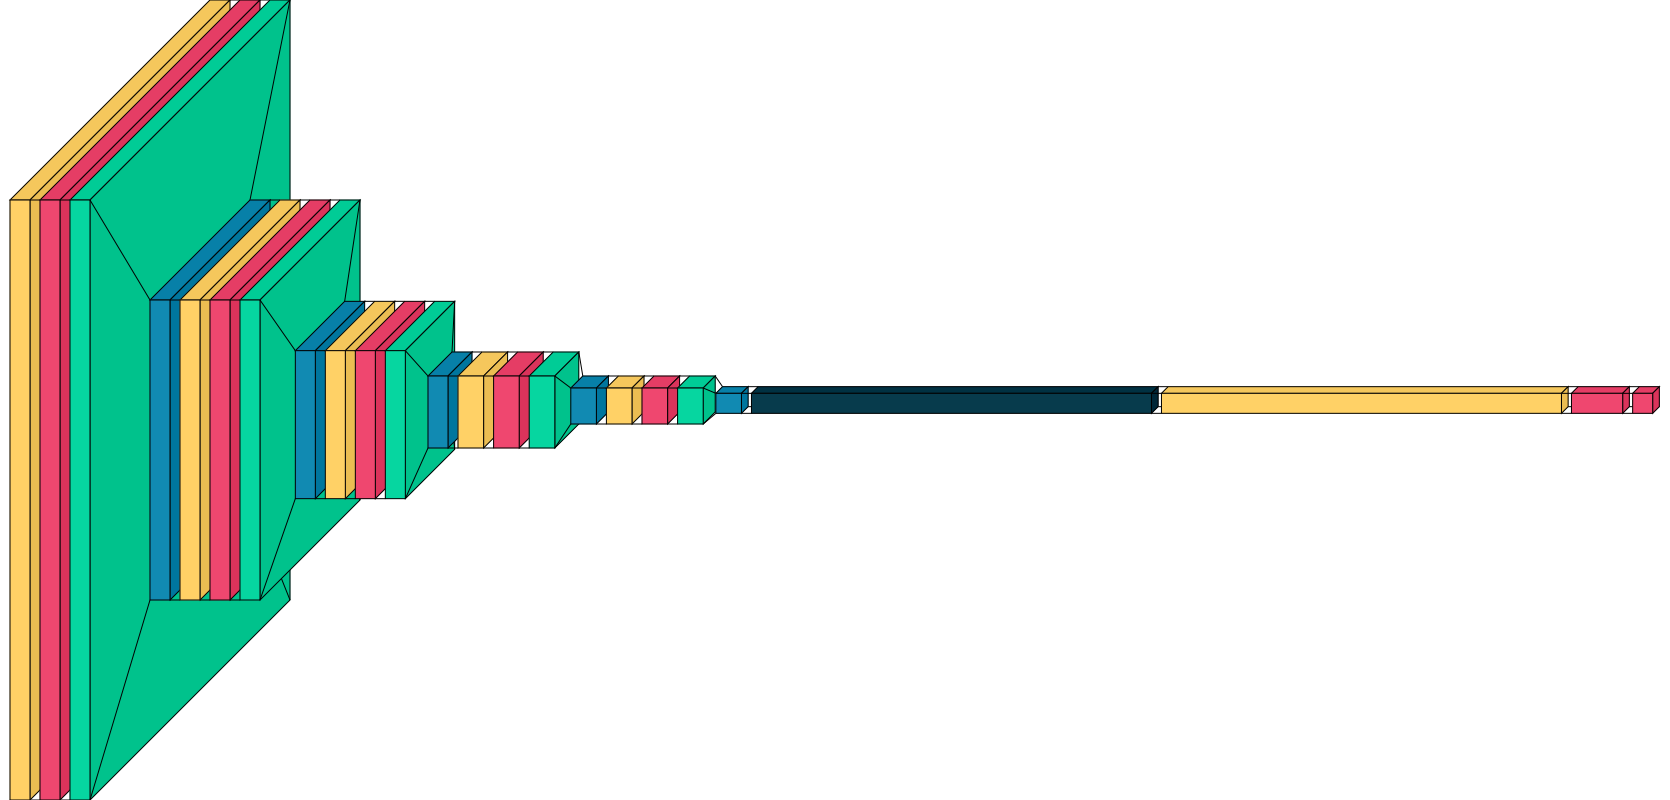

In [223]:
visualkeras.layered_view(model)

## 1.5.2 Basic CNN Model Compile

In [224]:
model.compile(loss='categorical_crossentropy', # 손실함수
              optimizer=optimizers.RMSprop(learning_rate=1e-5), # 최적화 알고리즘
              metrics=['accuracy'])  # 평가척도

## 1.5.3 Basic CNN Model Train

In [225]:
history=model.fit(
            train_generator,
            steps_per_epoch=15,
            epochs=60,
            validation_data=validation_generator,
            validation_steps=5
            )

Epoch 1/60
15/15 [==============================] - 20s 1s/step - loss: 1.8466 - accuracy: 0.3022 - val_loss: 1.3883 - val_accuracy: 0.2533
Epoch 2/60
15/15 [==============================] - 14s 913ms/step - loss: 1.5557 - accuracy: 0.3956 - val_loss: 1.3813 - val_accuracy: 0.3067
Epoch 3/60
15/15 [==============================] - 14s 885ms/step - loss: 1.3172 - accuracy: 0.4889 - val_loss: 1.4508 - val_accuracy: 0.2533
Epoch 4/60
15/15 [==============================] - 14s 960ms/step - loss: 1.3254 - accuracy: 0.4356 - val_loss: 1.4075 - val_accuracy: 0.2533
Epoch 5/60
15/15 [==============================] - 15s 957ms/step - loss: 1.1611 - accuracy: 0.5688 - val_loss: 1.4946 - val_accuracy: 0.2267
Epoch 6/60
15/15 [==============================] - 13s 882ms/step - loss: 1.0018 - accuracy: 0.5733 - val_loss: 1.4500 - val_accuracy: 0.2533
Epoch 7/60
15/15 [==============================] - 14s 940ms/step - loss: 0.9358 - accuracy: 0.6000 - val_loss: 1.5423 - val_accuracy: 0.3200
Ep

## 1.5.4 Basic CNN Model: train, validation loss&acc

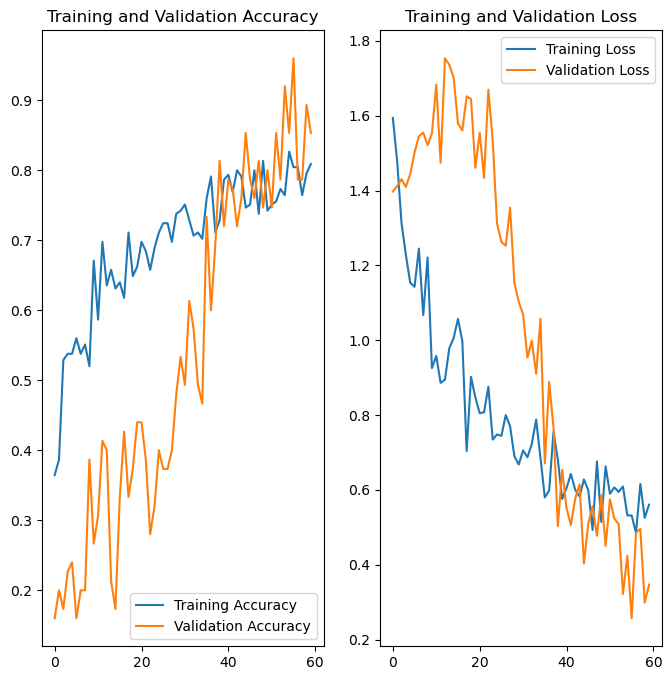

In [154]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs = 60
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## 1.6.1 Basic CNN Model: evaluate with test_data

In [227]:
history=model.fit(
            train_generator,
            steps_per_epoch=10,
            epochs=40,
            validation_data=test_generator,
            validation_steps=5
            )

Epoch 1/40
10/10 [==============================] - 9s 936ms/step - loss: 0.4637 - accuracy: 0.7933 - val_loss: 0.7557 - val_accuracy: 0.7600
Epoch 2/40
10/10 [==============================] - 8s 855ms/step - loss: 0.5552 - accuracy: 0.7800 - val_loss: 0.4624 - val_accuracy: 0.7467
Epoch 3/40
10/10 [==============================] - 9s 858ms/step - loss: 0.5760 - accuracy: 0.7667 - val_loss: 0.6371 - val_accuracy: 0.7467
Epoch 4/40
10/10 [==============================] - 9s 914ms/step - loss: 0.7326 - accuracy: 0.7333 - val_loss: 0.6477 - val_accuracy: 0.7600
Epoch 5/40
10/10 [==============================] - 9s 838ms/step - loss: 0.5215 - accuracy: 0.7933 - val_loss: 0.7231 - val_accuracy: 0.7467
Epoch 6/40
10/10 [==============================] - 9s 869ms/step - loss: 0.4168 - accuracy: 0.8467 - val_loss: 0.7741 - val_accuracy: 0.6933
Epoch 7/40
10/10 [==============================] - 10s 1s/step - loss: 0.5212 - accuracy: 0.8000 - val_loss: 0.4198 - val_accuracy: 0.8400
Epoch 8/

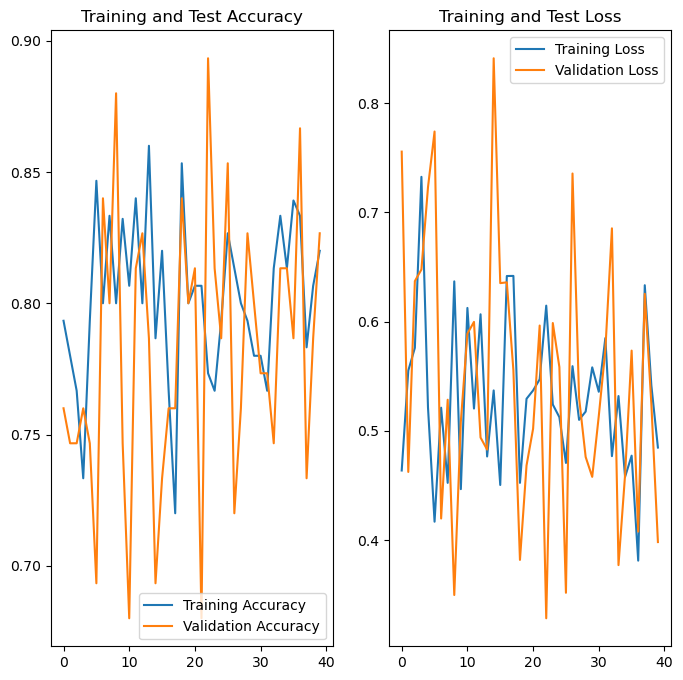

In [228]:
# loss들을 시각적으로 확인 후 test data로 모델 평가
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs = 40
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Test Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Test Loss')
plt.show()

In [229]:
print("-- Evaluate --")
scores = model.evaluate_generator(validation_generator, steps=5, verbose=1)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --


C:\Users\shoya\AppData\Local\Temp\ipykernel_29072\245695912.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(validation_generator, steps=5, verbose=1)


5/5 [==============================] - 2s 289ms/step - loss: 0.4159 - accuracy: 0.8400
accuracy: 84.00%


## 1.7.1 Hyperparameter Tuning -> 5-Conv + 3-F.C

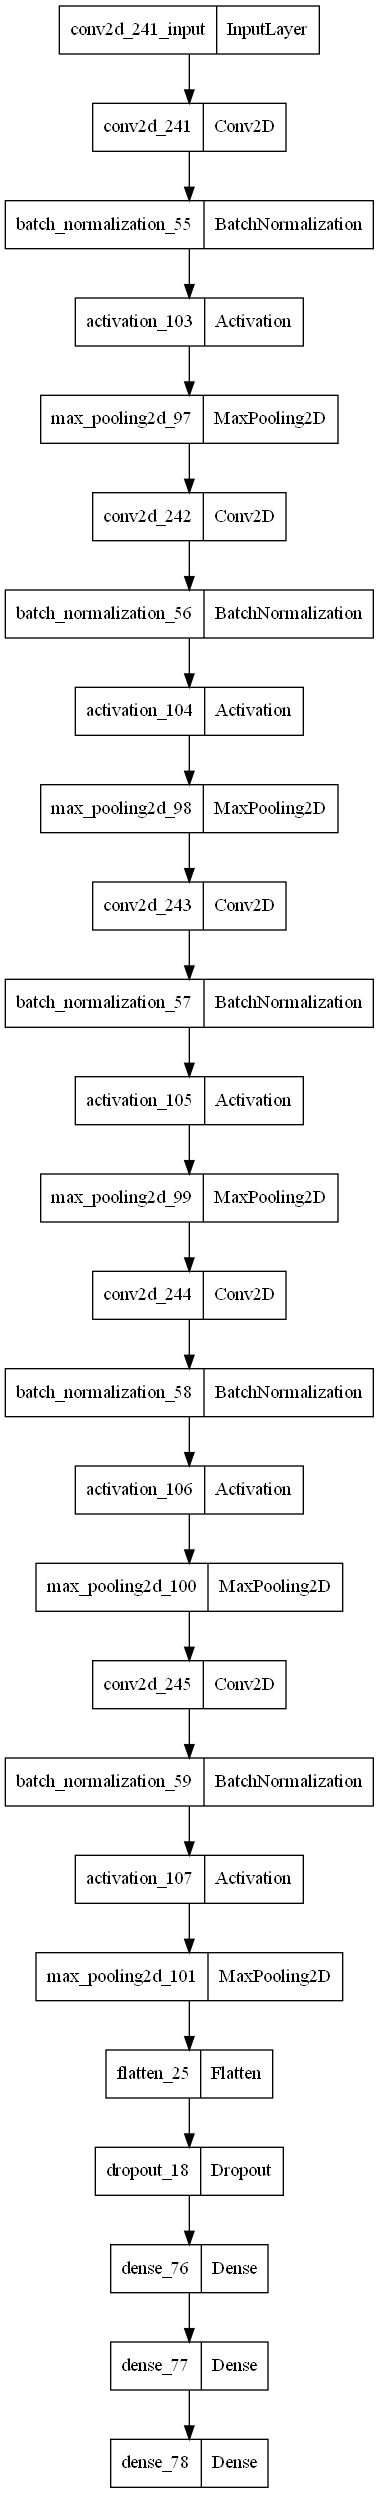

In [230]:
model = models.Sequential()
model.add(layers.Conv2D(64,  kernel_size=(3, 3),
                        padding = 'same',
                        input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128,  kernel_size=(3, 3),
                        padding = 'same',
                        ))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256,  kernel_size=(3, 3),
                        padding = 'same',
                        ))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(512,  kernel_size=(3, 3),
                        padding = 'same',
                        ))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(512,  kernel_size=(3, 3),
                        padding = 'same',
                        ))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten()) # F.C layer에 넣기 위한 flatten
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax')) # 분류를 위한 활성함수

model.summary
tensorflow.keras.utils.plot_model(model)

## 1.7.2 Tuned model: evaluate using validation set

Epoch 1/60
15/15 [==============================] - 43s 2s/step - loss: 1.3544 - accuracy: 0.4711 - val_loss: 1.3957 - val_accuracy: 0.2267
Epoch 2/60
15/15 [==============================] - 33s 2s/step - loss: 1.1765 - accuracy: 0.4933 - val_loss: 1.3801 - val_accuracy: 0.4267
Epoch 3/60
15/15 [==============================] - 33s 2s/step - loss: 0.9721 - accuracy: 0.5956 - val_loss: 1.4421 - val_accuracy: 0.1467
Epoch 4/60
15/15 [==============================] - 32s 2s/step - loss: 0.7841 - accuracy: 0.6667 - val_loss: 1.4015 - val_accuracy: 0.2667
Epoch 5/60
15/15 [==============================] - 34s 2s/step - loss: 0.9945 - accuracy: 0.6055 - val_loss: 1.4336 - val_accuracy: 0.2000
Epoch 6/60
15/15 [==============================] - 34s 2s/step - loss: 0.9158 - accuracy: 0.6178 - val_loss: 1.5165 - val_accuracy: 0.2400
Epoch 7/60
15/15 [==============================] - 33s 2s/step - loss: 0.8383 - accuracy: 0.6667 - val_loss: 1.5036 - val_accuracy: 0.2533
Epoch 8/60
15/15 [==

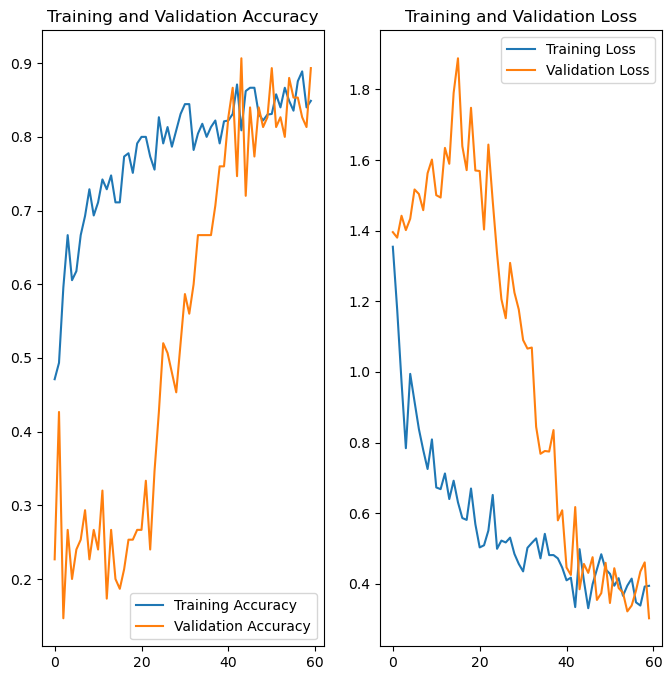

In [231]:
model.compile(loss='categorical_crossentropy', # 손실함수
              optimizer=optimizers.RMSprop(learning_rate=1e-5), # 최적화 알고리즘
              metrics=['accuracy'])  # 평가척도

history=model.fit(
            train_generator,
            steps_per_epoch=15,
            epochs=60,
            validation_data=validation_generator,
            validation_steps=5
            )

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs = 60
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## 1.7.3 Tuned Model: evaluate with test_set

Epoch 1/40
15/15 [==============================] - 36s 2s/step - loss: 0.4651 - accuracy: 0.8533 - val_loss: 0.4074 - val_accuracy: 0.8933
Epoch 2/40
15/15 [==============================] - 33s 2s/step - loss: 0.4472 - accuracy: 0.8400 - val_loss: 0.2655 - val_accuracy: 0.8533
Epoch 3/40
15/15 [==============================] - 34s 2s/step - loss: 0.3704 - accuracy: 0.8533 - val_loss: 0.5833 - val_accuracy: 0.7600
Epoch 4/40
15/15 [==============================] - 33s 2s/step - loss: 0.3943 - accuracy: 0.8800 - val_loss: 0.6021 - val_accuracy: 0.8000
Epoch 5/40
15/15 [==============================] - 31s 2s/step - loss: 0.3726 - accuracy: 0.8622 - val_loss: 0.5228 - val_accuracy: 0.8533
Epoch 6/40
15/15 [==============================] - 32s 2s/step - loss: 0.3477 - accuracy: 0.8756 - val_loss: 0.4989 - val_accuracy: 0.8267
Epoch 7/40
15/15 [==============================] - 34s 2s/step - loss: 0.3557 - accuracy: 0.8533 - val_loss: 0.5209 - val_accuracy: 0.8000
Epoch 8/40
15/15 [==

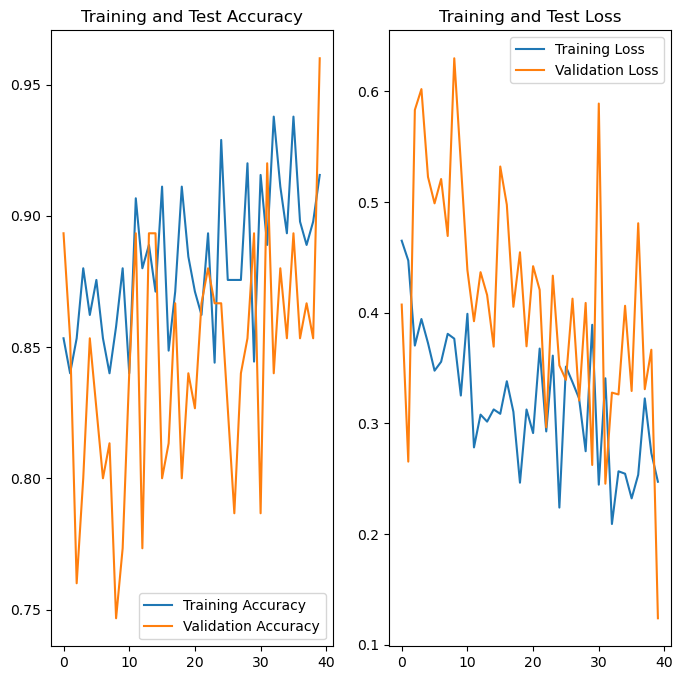

In [232]:
history=model.fit(
            train_generator,
            steps_per_epoch=15,
            epochs=40,
            validation_data=test_generator,
            validation_steps=5
            )

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs = 40
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Test Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Test Loss')
plt.show()

## 1.8.1 Visualization-1: load imags

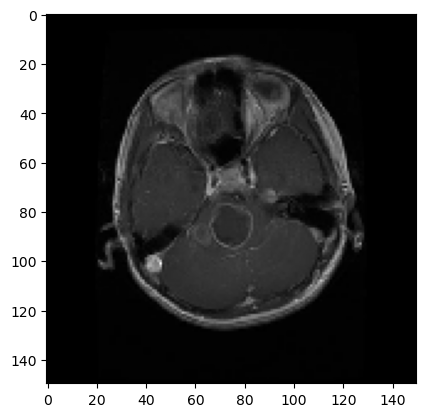

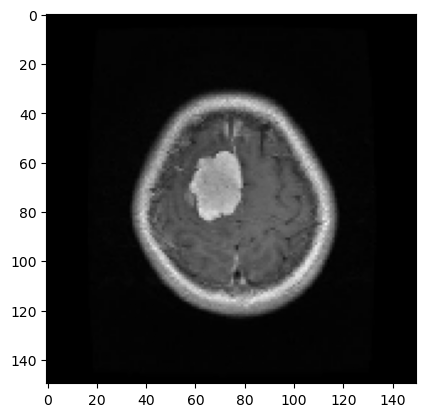

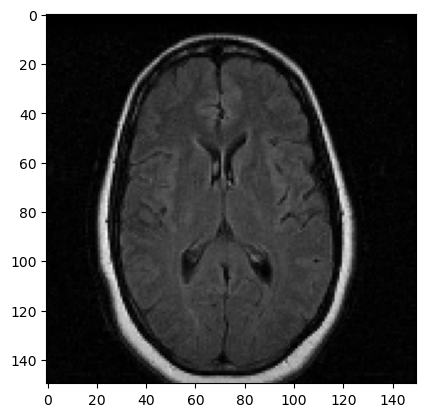

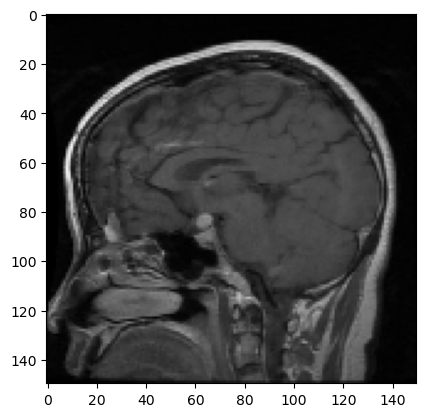

In [167]:
def show_image(img_path, target_size):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=target_size)
    img_tensor = tf.keras.preprocessing.image.img_to_array(img)

    img_tensor /= 255

    plt.imshow(img_tensor)
    plt.show()

['glioma', 'meningioma', 'notumor', 'pituitary']
glioma_path = 'C:/archive/Train/glioma/Tr-gl_0070.jpg'
meningioma_path = 'C:/archive/Train/meningioma/Tr-me_0031.jpg'
notumor_path = 'C:/archive/Train/notumor/Tr-no_0036.jpg'
pituitary_path = 'C:/archive/Train/pituitary/Tr-pi_0050.jpg'

# 각 클래스 별로 경로 지정이 제대로 되었는지 확인
show_image(glioma_path, target_size=(150, 150))
show_image(meningioma_path, target_size=(150, 150))
show_image(notumor_path, target_size=(150, 150))
show_image(pituitary_path, target_size=(150, 150))

## 1.8.2 Visualization-2: Visualzie feature maps

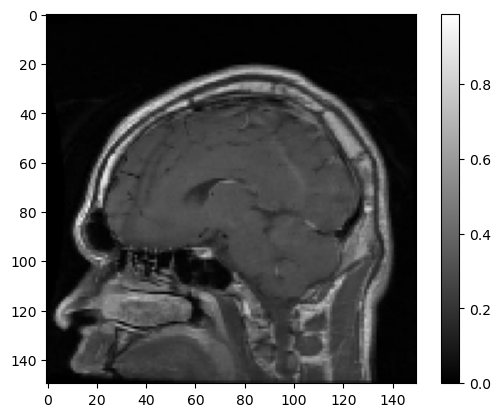

1/1 [==============================] - 0s 495ms/step
(1, 150, 150, 64)
1/1 [==============================] - 0s 196ms/step
(1, 150, 150, 64)
1/1 [==============================] - 0s 168ms/step
(1, 75, 75, 64)
1/1 [==============================] - 0s 256ms/step
(1, 75, 75, 128)
1/1 [==============================] - 0s 238ms/step
(1, 75, 75, 128)
1/1 [==============================] - 0s 238ms/step
(1, 75, 75, 128)
1/1 [==============================] - 0s 234ms/step
(1, 37, 37, 128)
1/1 [==============================] - 0s 268ms/step
(1, 37, 37, 256)
1/1 [==============================] - 0s 375ms/step
(1, 37, 37, 256)
1/1 [==============================] - 0s 333ms/step
(1, 37, 37, 256)
1/1 [==============================] - 0s 398ms/step
(1, 18, 18, 256)
1/1 [==============================] - 2s 2s/step
(1, 18, 18, 512)
1/1 [==============================] - 0s 403ms/step
(1, 18, 18, 512)
1/1 [==============================] - 0s 365ms/step
(1, 18, 18, 512)
1/1 [=================

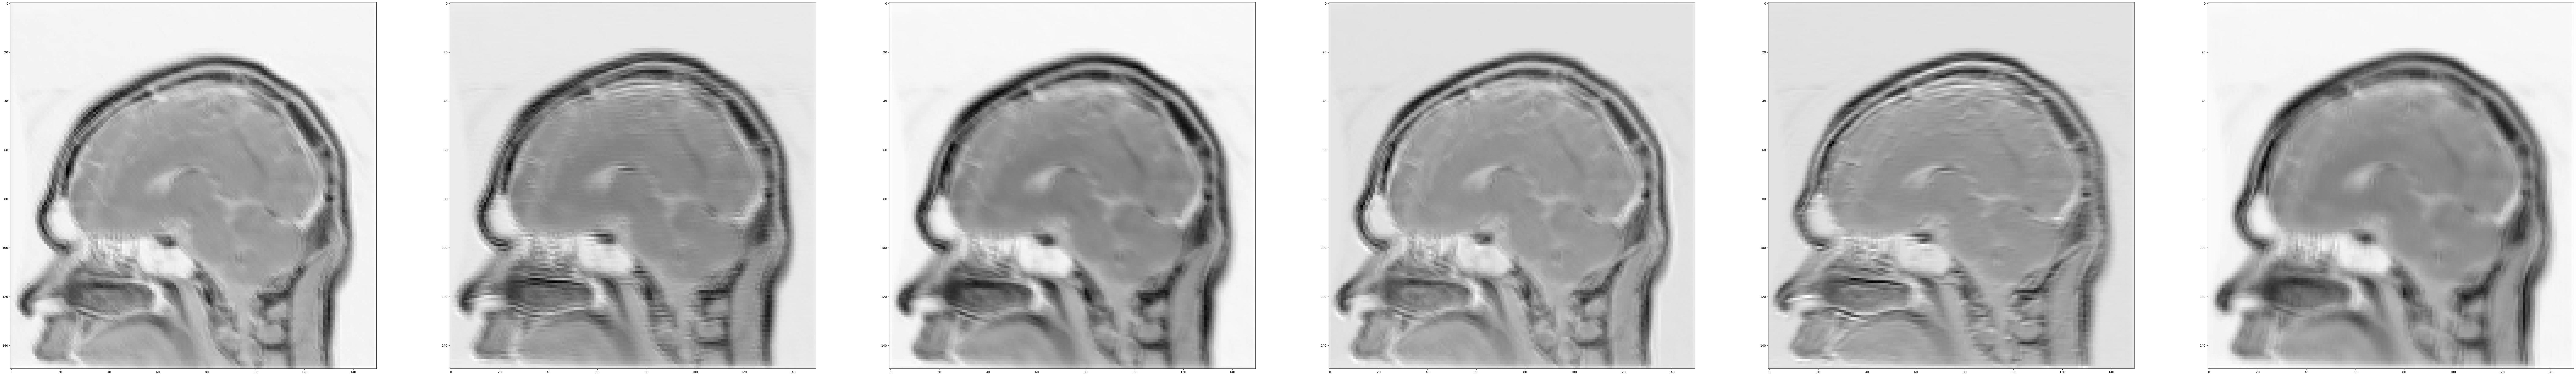

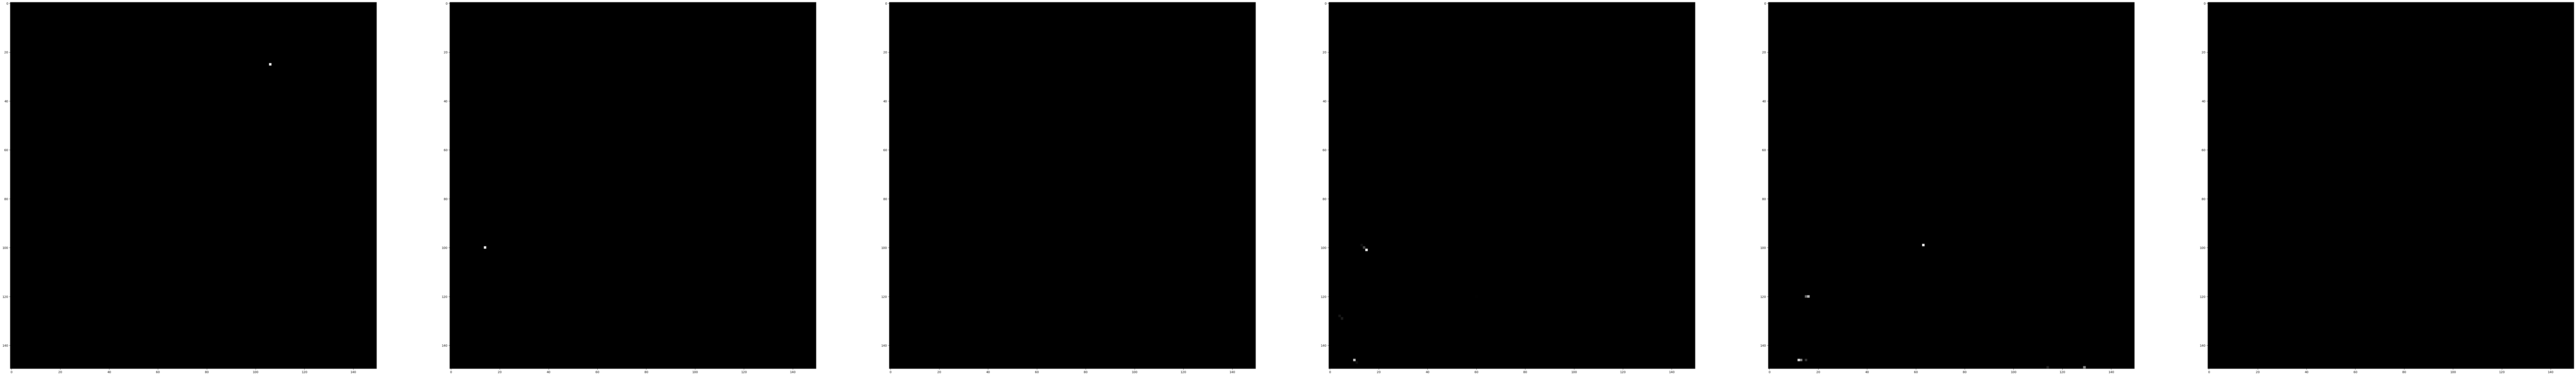

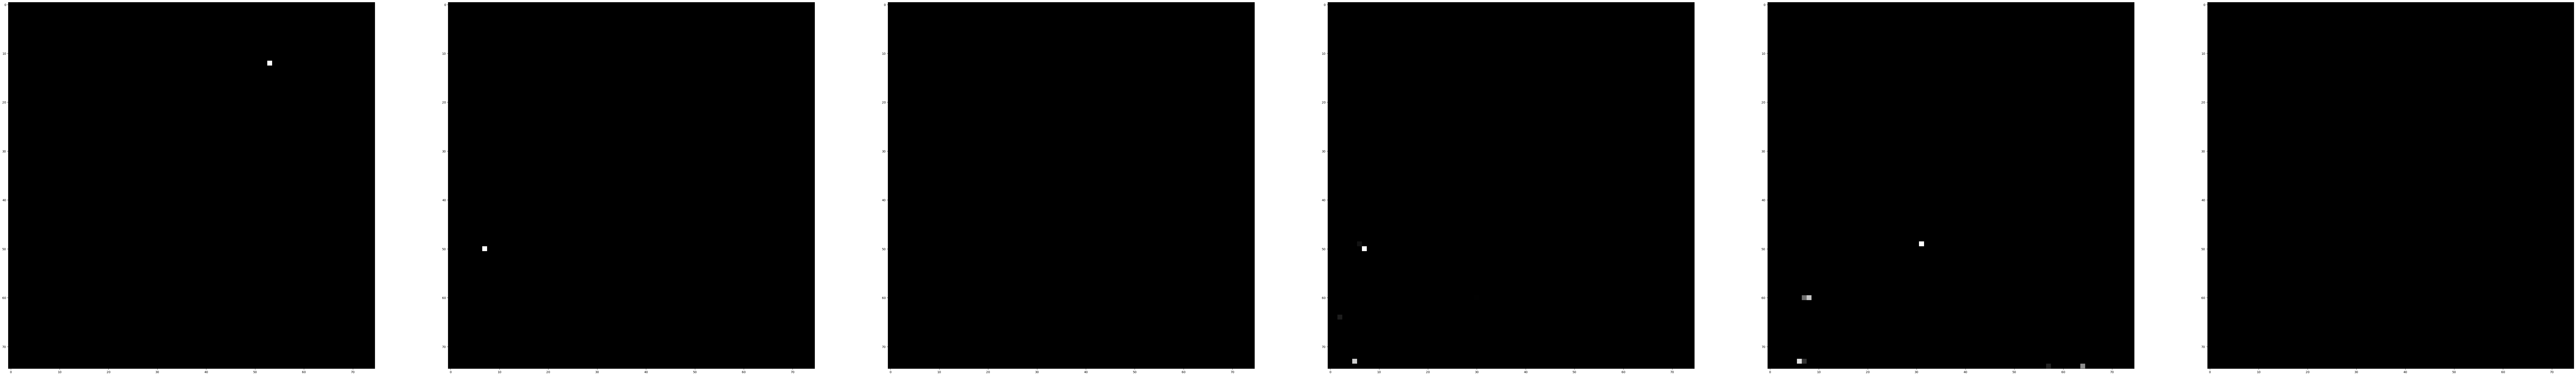

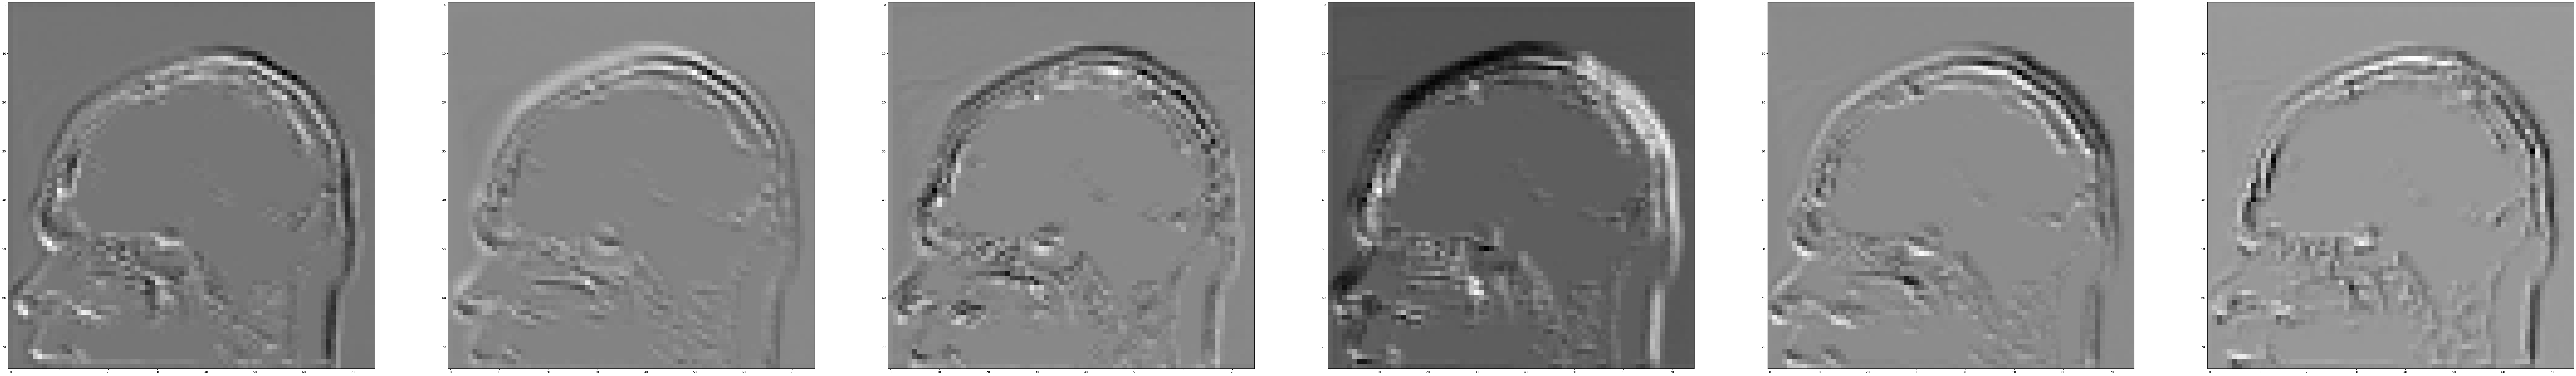

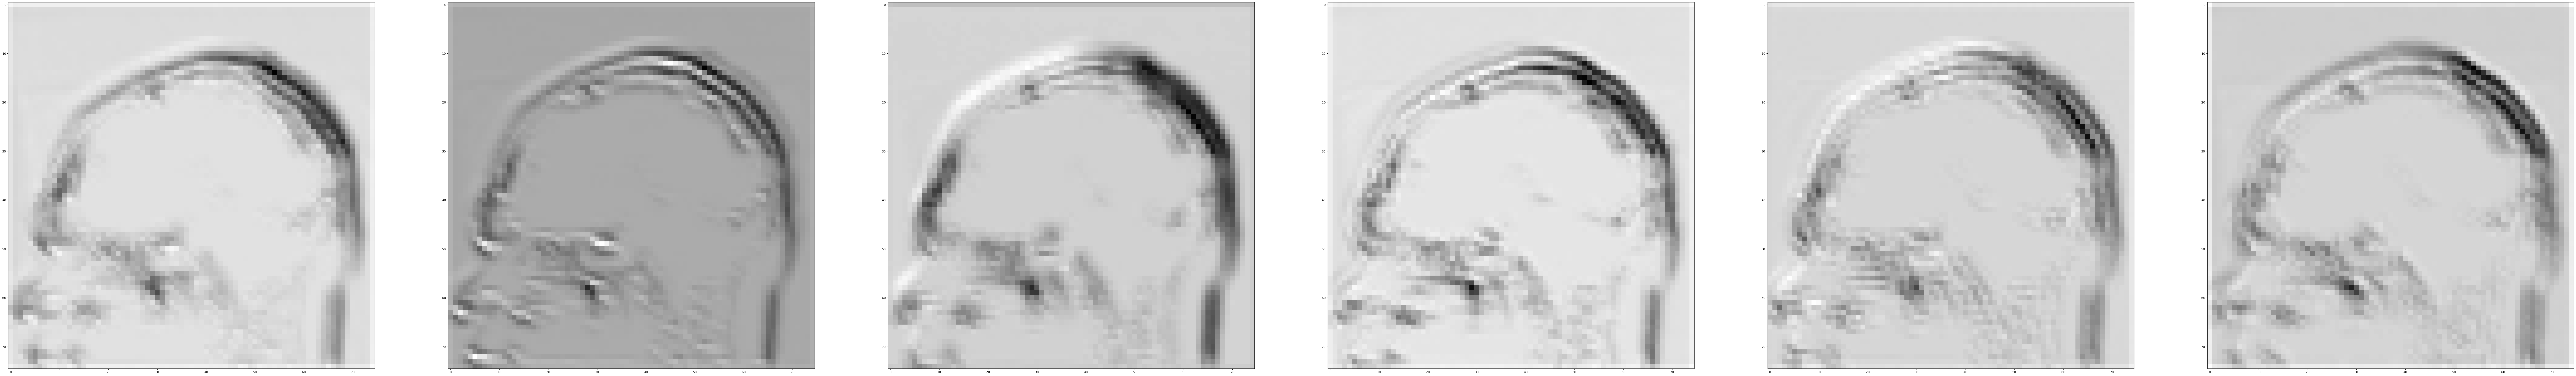

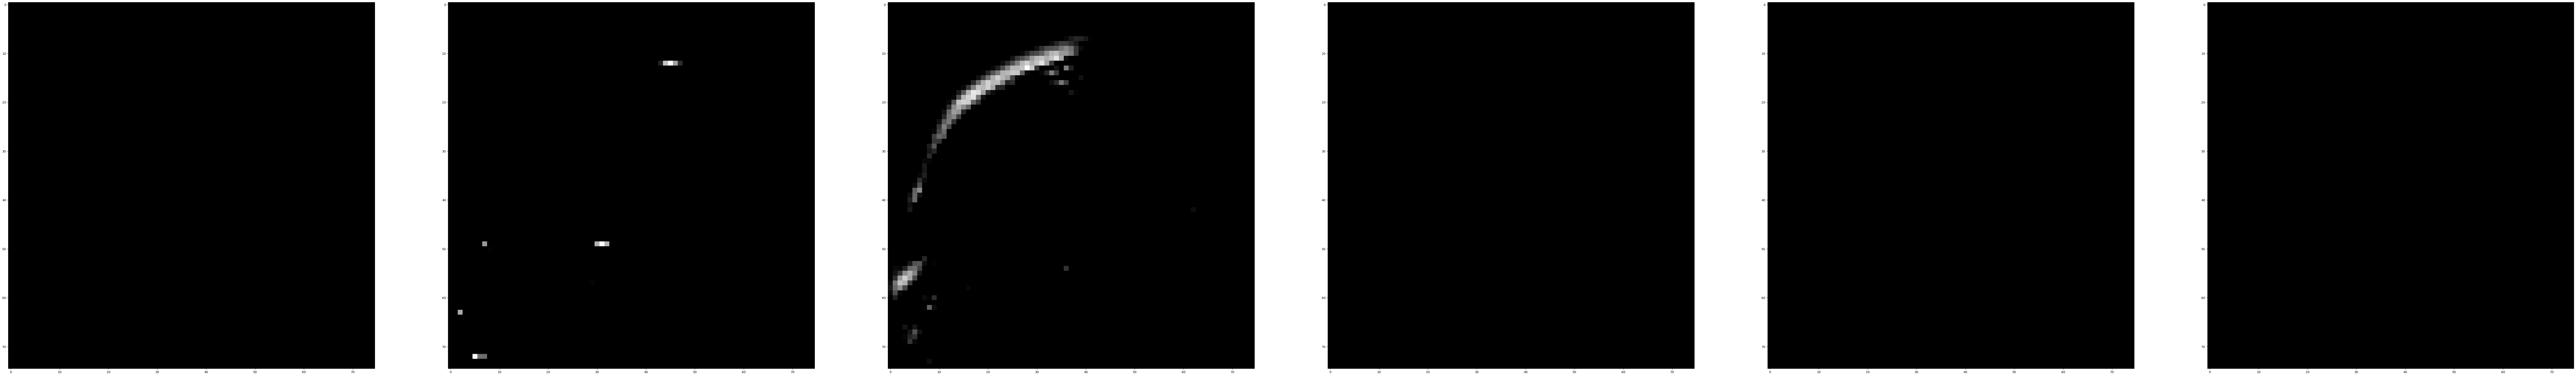

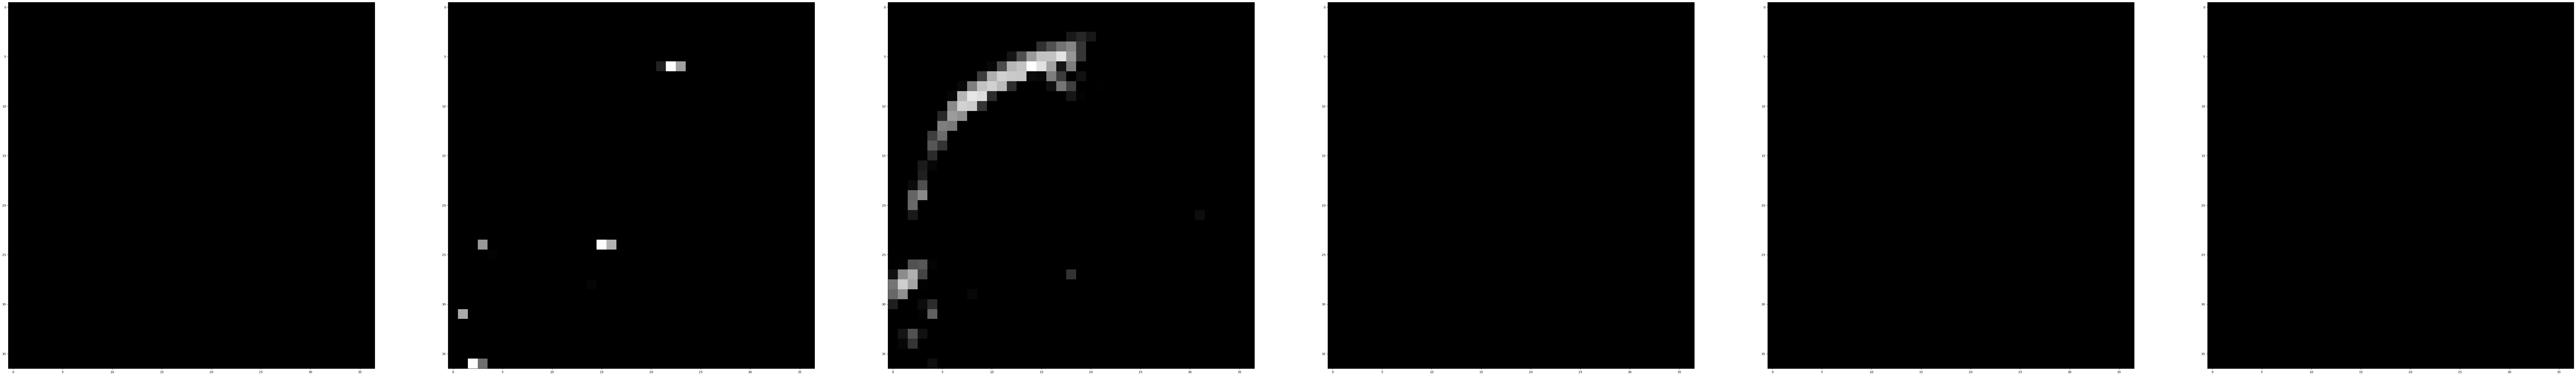

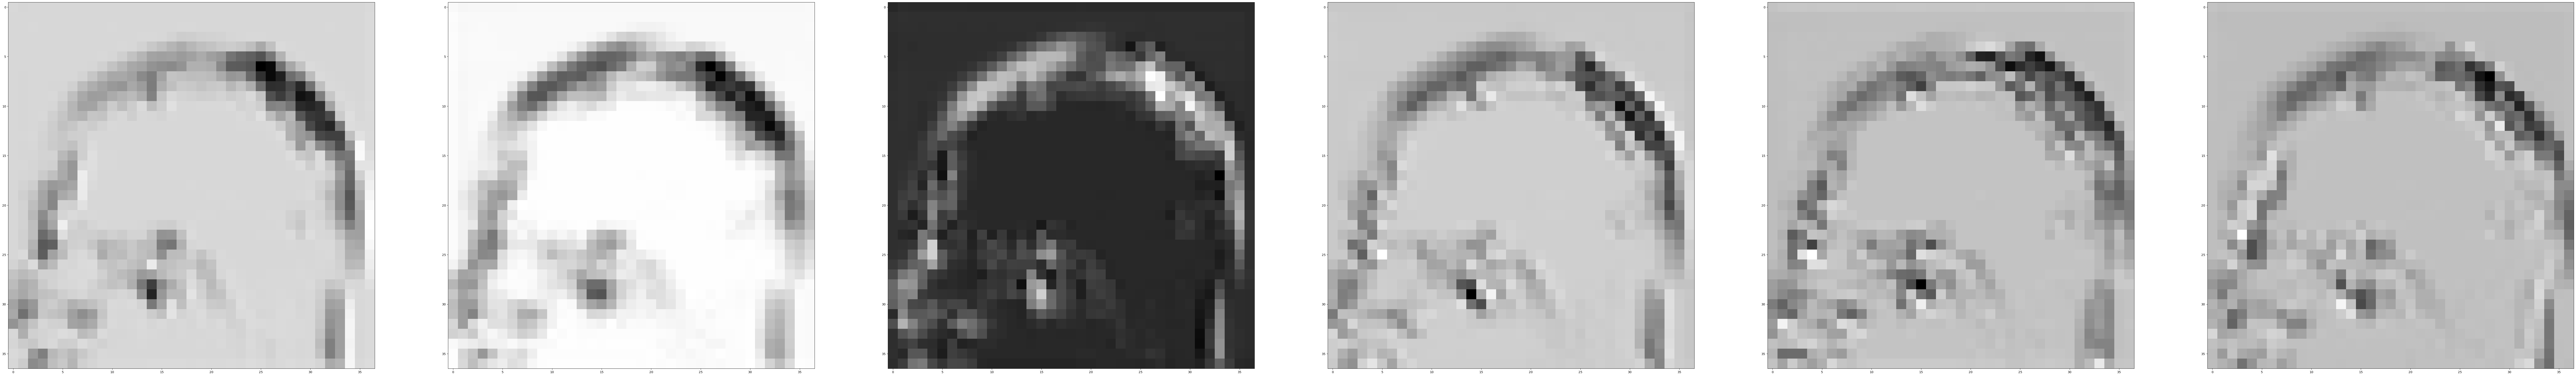

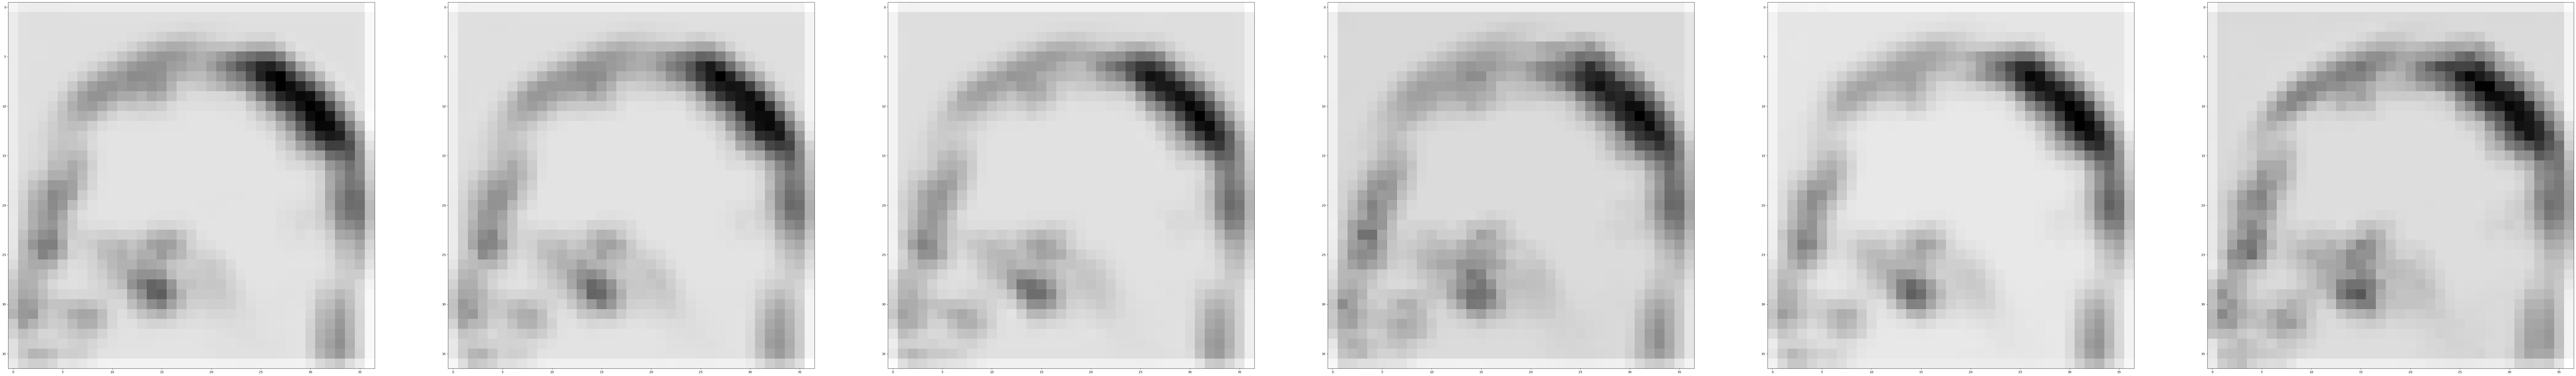

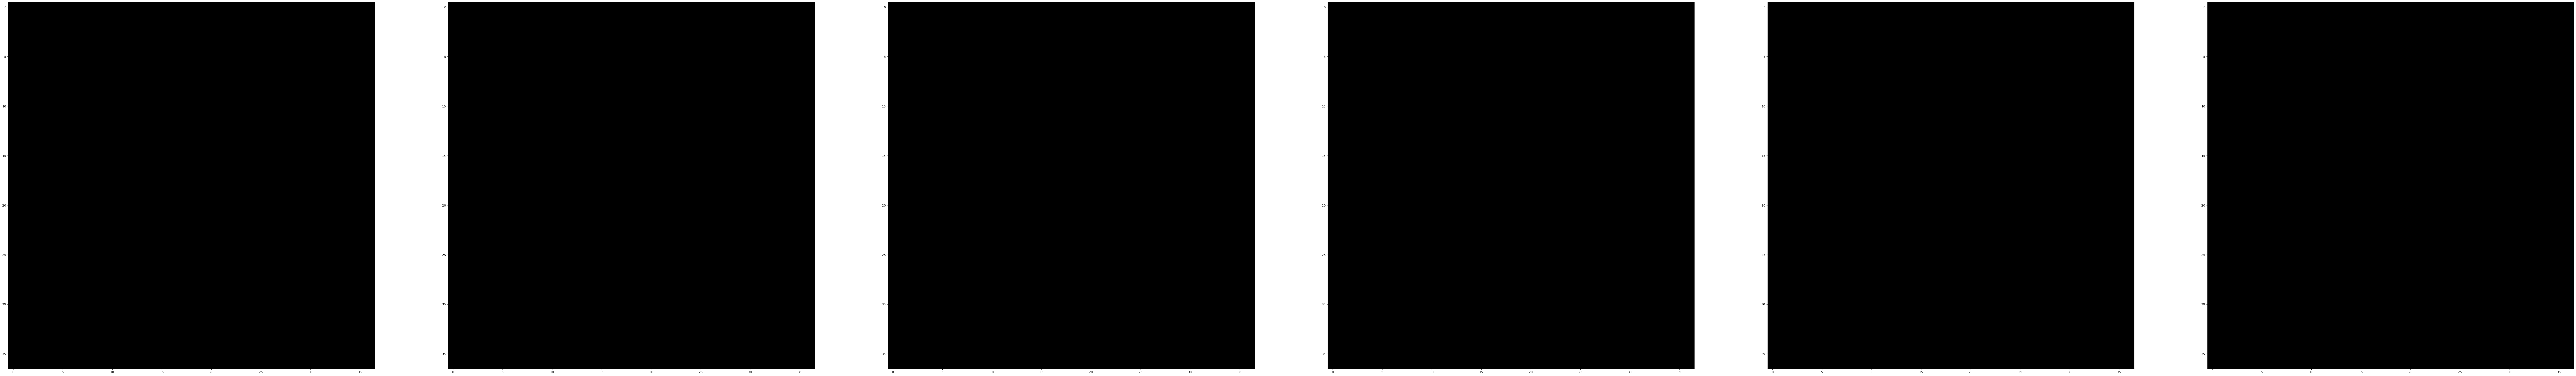

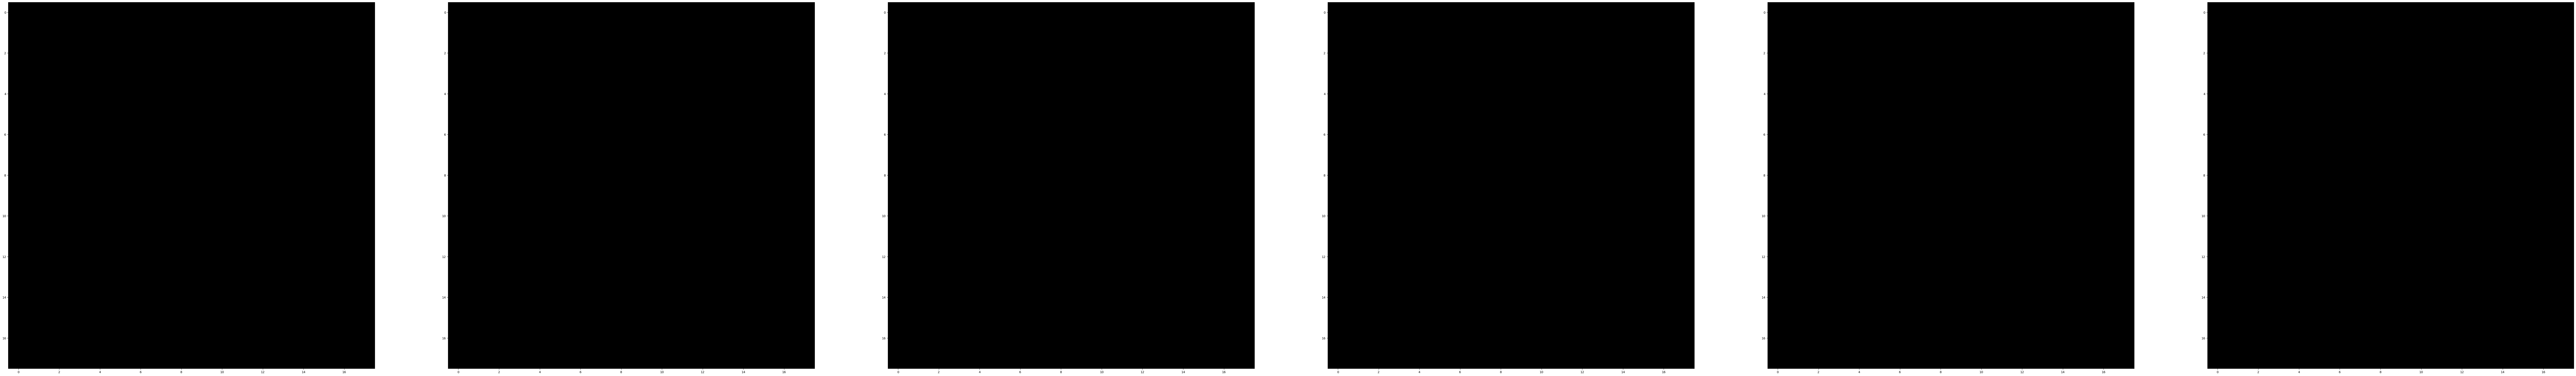

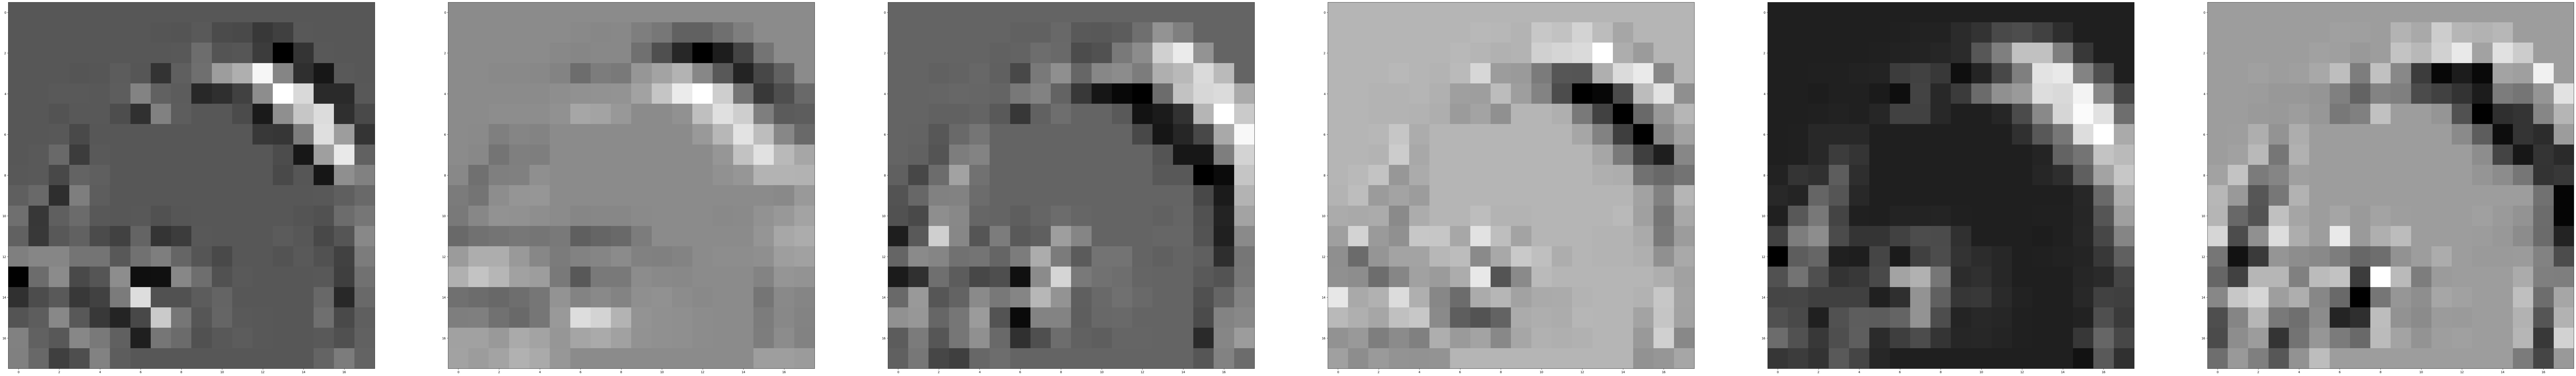

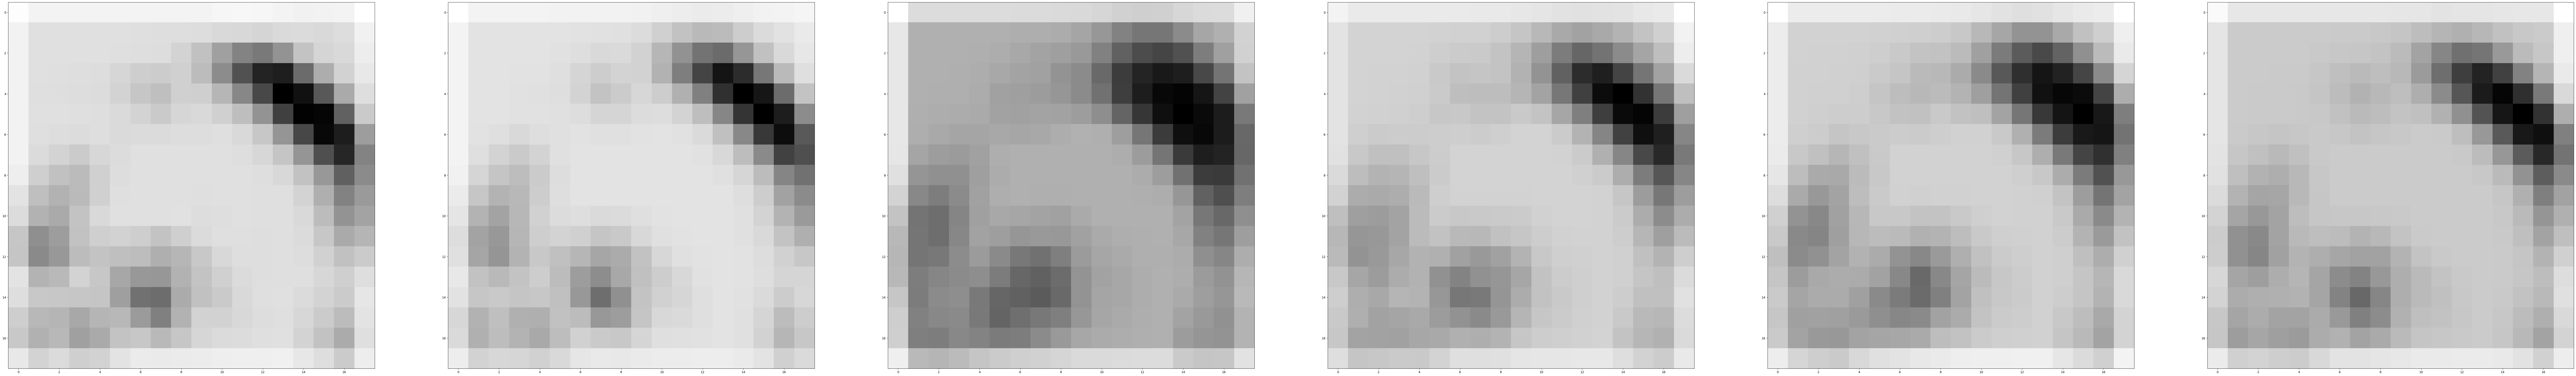

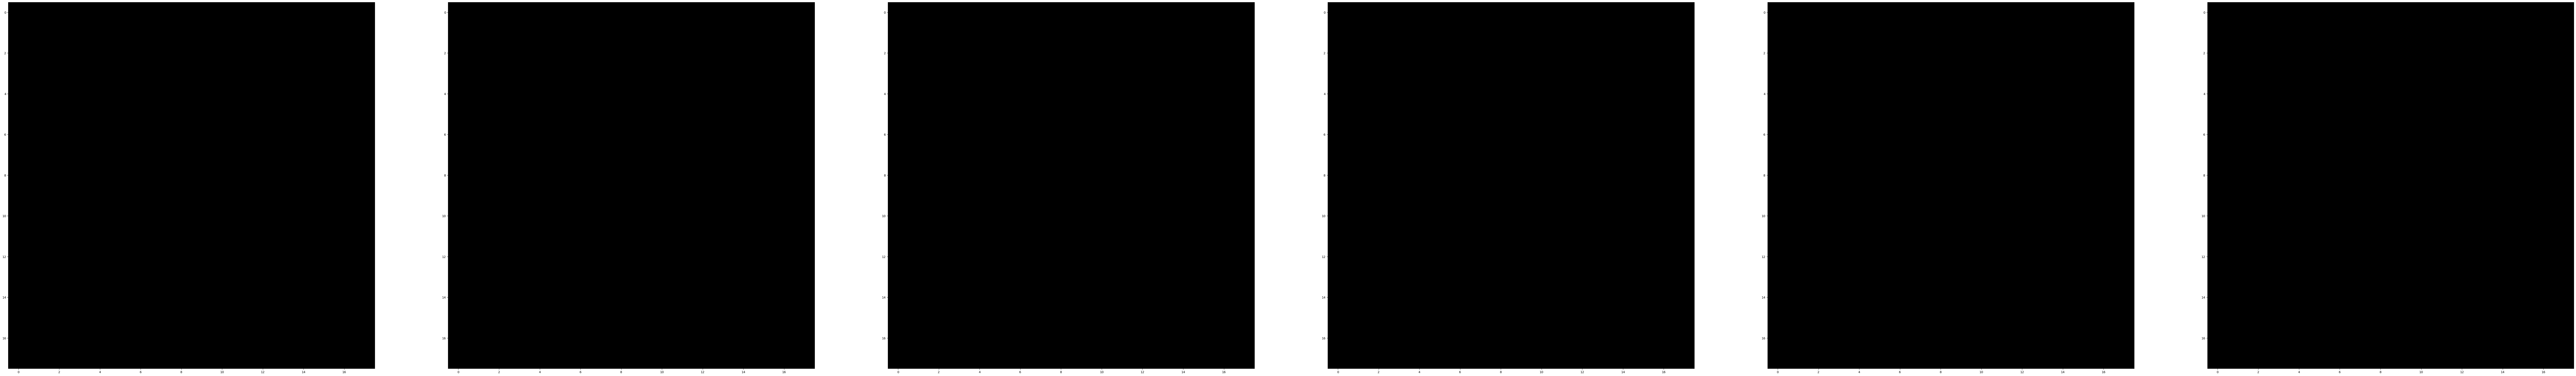

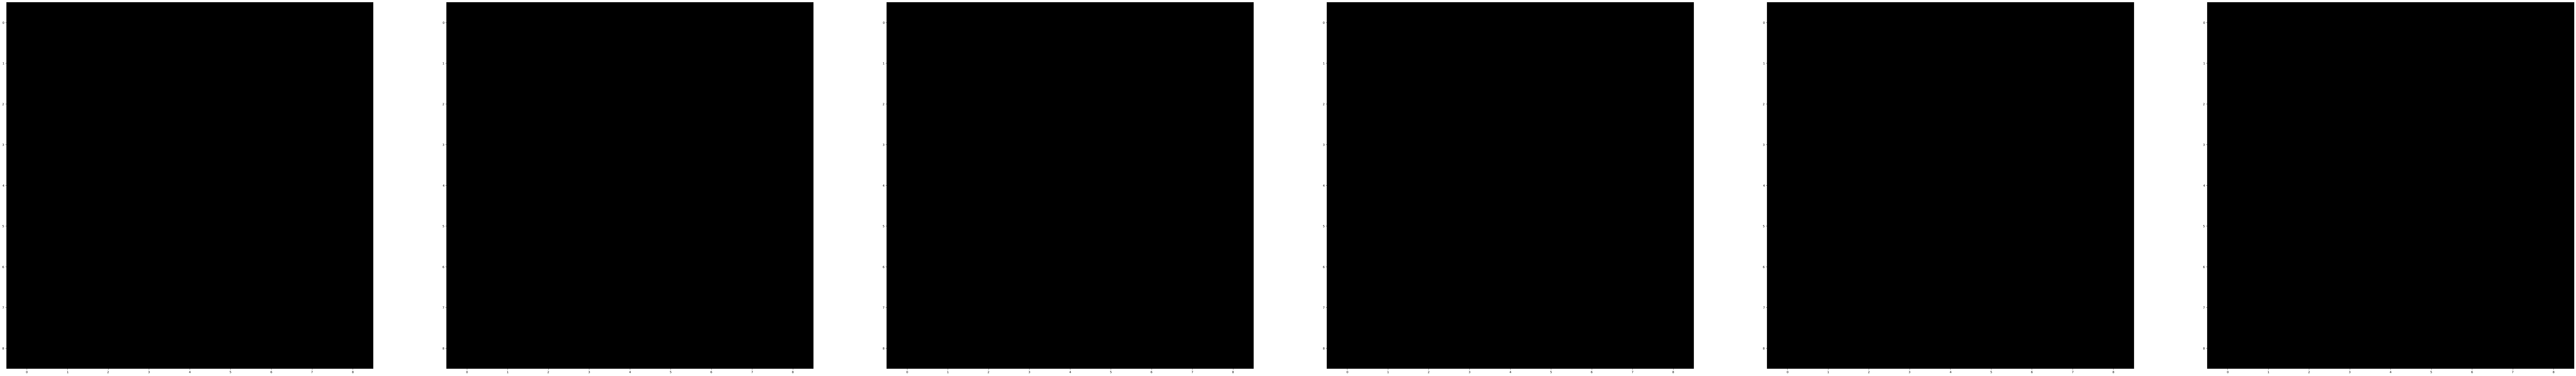

In [217]:
def check_feature(num_layer, input_img):
    ins = model.inputs
    outs = model.layers[num_layer].output

    feature_map = tf.keras.models.Model(ins, outs)
    input_img = np.expand_dims(input_img, axis=0)

    feature = feature_map.predict(input_img)
    print(feature.shape)

    plt.figure(figsize=(150,150))
    for i in range(6):
        plt.subplot(1,6, i+1)
        plt.imshow(feature[0,:,:,i], cmap="gray")

plt.show()

plt.figure()
plt.imshow(x_train[7], cmap="gray")
plt.colorbar()
plt.show()
        
for i in range(1, 16):
      check_feature(i, x_train[7])

1/1 [==============================] - 4s 4s/step


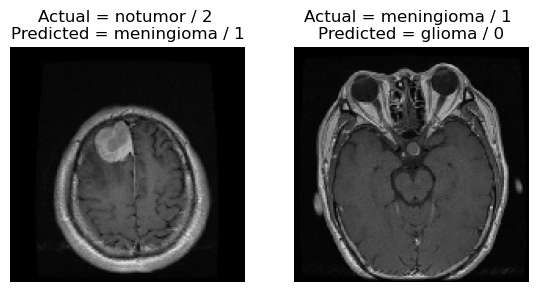

In [218]:
y_pred = model.predict(x_validation).round(2)

y_val_label = list(map(np.argmax, y_validation))
y_pred_label = list(map(np.argmax, y_pred))

not_equel = np.array(y_val_label) != np.array(y_pred_label)

not_equel_list = np.where(not_equel == True)[0]

plt.figure(figsize = (25,25))
j = 1
for i in not_equel_list[0:49]:
# for a in np.random.randint(0,206,36):
#     i = not_equel_list[a]
#     print(a)
    plt.subplot(7,7,j); j+=1
    plt.imshow(x_val[i].reshape(150,150,3),cmap = 'Greys')
    plt.axis('off')
    plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(categories[y_val_label[i]],
                                                            y_val_label[i],
                                                            categories[y_pred_label[i]],
                                                            y_pred_label[i]))